In [70]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
%matplotlib inline

# Questions to consider: 

### 1. What is the mean age and gender distribution in each country?
<br>


### 2. Which product category yields the most profit? Which Subcategory? What about the least?
<br>


### 3. What time of day is the busiest in the store? 
<br>


### 4. Which month ranks highest in terms of the most sales? 
<br>


### 5. Which Country has the most revenue, should any shops be eliminated?

In [71]:
df = pd.read_csv('/Users/aahiljivani/Downloads/archive (5)/Fezzari Sales.csv', parse_dates= ['Date'])
df.head(5)

/var/folders/1j/p8whwxms6f1814w2ryl5tf580000gn/T/ipykernel_1946/3617404133.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/Users/aahiljivani/Downloads/archive (5)/Fezzari Sales.csv', parse_dates= ['Date'])


,Date,Time,Year,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Revenue,Payment,Rating
0,2016-02-19,13:08,2016.0,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.0,Credit Card,6.5
1,2016-02-20,10:29,2016.0,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,57.0,Credit Card,5.0
2,2016-02-27,13:23,2016.0,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,15.0,Cash,7.5
3,2016-12-03,20:33,2016.0,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,233.0,Cash,6.5
4,2016-12-03,10:37,2016.0,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,125.0,Cash,8.0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Time              34866 non-null  object        
 2   Year              34866 non-null  float64       
 3   Customer Age      34864 non-null  float64       
 4   Customer Gender   34864 non-null  object        
 5   Country           34866 non-null  object        
 6   State             34864 non-null  object        
 7   Product Category  34863 non-null  object        
 8   Sub Category      34864 non-null  object        
 9   Quantity          34866 non-null  float64       
 10  Unit Cost         34864 non-null  float64       
 11  Revenue           34866 non-null  float64       
 12  Payment           34867 non-null  object        
 13  Rating            34866 non-null  float64       
dtypes: datetime64[ns](1), 

In [73]:
df.isnull().sum()



Date                1
Time                1
Year                1
Customer Age        3
Customer Gender     3
Country             1
State               3
Product Category    4
Sub Category        3
Quantity            1
Unit Cost           3
Revenue             1
Payment             0
Rating              1
dtype: int64

In [74]:
# There are not that many null values. Let's drop the rows that are null in that case.
df = df.dropna()

In [75]:
# Now that we have Revenue and Unit Cost; perhaps it would be a good idea here to make a column 
# with the difference between these two figures and rename it to profit.

pd.DataFrame(df.loc[:,['Revenue','Unit Cost']])
revenue = np.array(df['Revenue'])
unit_cost = np.array(df['Unit Cost'])
profit = np.subtract(revenue,unit_cost)
df['Profit'] = profit
# df['Profit'].astype('int64')
df.tail()


,Date,Time,Year,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Revenue,Payment,Rating,Profit
34860,2016-02-24,13:24,2016.0,37.0,M,Germany,Bayern,Bikes,Mountain Bikes,2.0,384.5,1072.0,Cash,7.0,687.5
34861,2015-03-22,18:06,2015.0,38.0,M,France,Charente-Maritime,Bikes,Mountain Bikes,1.0,2049.0,1487.0,Cash,9.0,-562.0
34863,2015-03-13,11:42,2015.0,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.0,1583.0,Cash,9.5,-466.0
34864,2015-05-04,14:30,2015.0,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.0,1682.0,Cash,7.0,999.0
34865,2015-08-30,15:11,2015.0,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.0,1568.0,Cash,9.5,-752.0


In [76]:
# Check the data types so further analysis can be done with no TypeErrors.
df.dtypes



Date                datetime64[ns]
Time                        object
Year                       float64
Customer Age               float64
Customer Gender             object
Country                     object
State                       object
Product Category            object
Sub Category                object
Quantity                   float64
Unit Cost                  float64
Revenue                    float64
Payment                     object
Rating                     float64
Profit                     float64
dtype: object

In [77]:
df[['Year', 'Customer Age', 'Quantity']] = df[['Year', 'Customer Age', 'Quantity']].astype('int') 

In [78]:
df.dtypes

Date                datetime64[ns]
Time                        object
Year                         int64
Customer Age                 int64
Customer Gender             object
Country                     object
State                       object
Product Category            object
Sub Category                object
Quantity                     int64
Unit Cost                  float64
Revenue                    float64
Payment                     object
Rating                     float64
Profit                     float64
dtype: object

In [79]:
df[['Time']] = df[['Time']].astype('string') 

In [80]:
df.head()

,Date,Time,Year,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Revenue,Payment,Rating,Profit
0,2016-02-19,13:08,2016,29,F,United States,Washington,Accessories,Tires and Tubes,1,80.00,109.0,Credit Card,6.5,29.00
1,2016-02-20,10:29,2016,29,F,United States,Washington,Clothing,Gloves,2,24.50,57.0,Credit Card,5.0,32.50
2,2016-02-27,13:23,2016,29,F,United States,Washington,Accessories,Tires and Tubes,3,3.67,15.0,Cash,7.5,11.33
3,2016-12-03,20:33,2016,29,F,United States,Washington,Accessories,Tires and Tubes,2,87.50,233.0,Cash,6.5,145.50
4,2016-12-03,10:37,2016,29,F,United States,Washington,Accessories,Tires and Tubes,3,35.00,125.0,Cash,8.0,90.00


In [81]:
# Check to see if there are duplicate records.
df.duplicated().sum()


0

The mean age of this distribution is 36.38 years old.


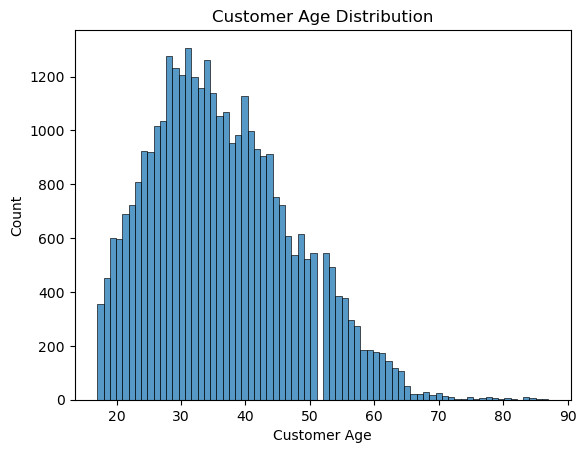

In [82]:
# Let's take a look at the demographic of bike sales in depth.
age = df['Customer Age']
average_age = round(np.mean(age),2)

sb.histplot(df['Customer Age']);
plt.title('Customer Age Distribution')
plt.ylabel('Count')

print('The mean age of this distribution is {} years old.'.format(average_age))

Text(0.5, 1.0, 'Gender Plot ')

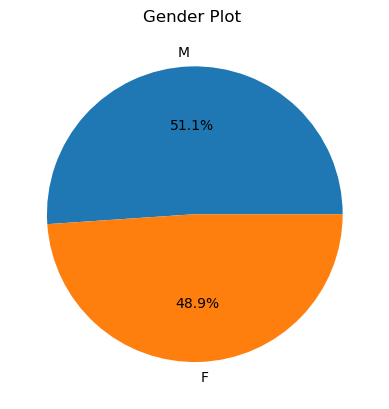

In [83]:
# This is the Gender split among transactions overall.

gender = df['Customer Gender'].value_counts()
gender
plt.pie(gender, labels= gender.index, autopct='%1.1f%%');
plt.title('Gender Plot ')

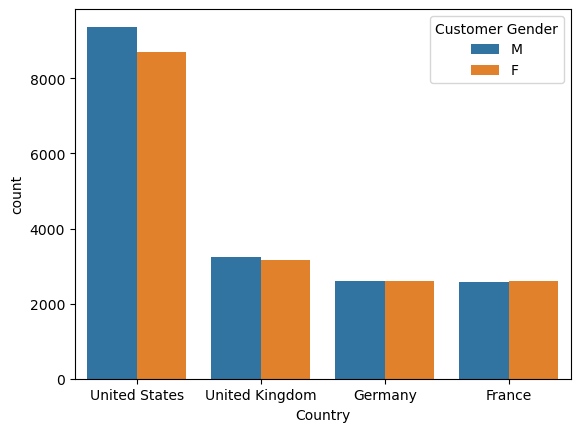

In [84]:
gender_country = df[['Country', 'Customer Gender']]
gender_vc = pd.DataFrame(gender_country.value_counts().reset_index())

gender_vc
sb.barplot(data = gender_vc, x= 'Country', y= 'count', hue='Customer Gender');

In [85]:
# let's see which product category generates the most revenue.

product = pd.DataFrame(df.loc[:,['Product Category', 'Profit']])
quantity_y = pd.DataFrame(product.groupby(['Product Category']).sum().reset_index())
quantity_y = quantity_y.sort_values(by='Profit', ascending=False) 
print(quantity_y, "\n")
print("The {} category generates the most revenue at ${}".format(quantity_y['Product Category'].iloc[0],quantity_y['Profit'].iloc[0]))




  Product Category      Profit
1            Bikes  4725011.99
0      Accessories  3741605.15
2         Clothing  1674782.02 

The Bikes category generates the most revenue at $4725011.99


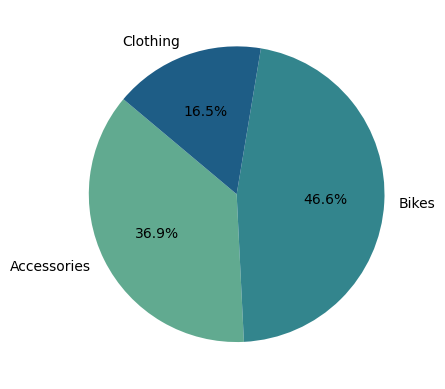

In [86]:
# plt.figure(figsize= (10,6))
# bar = sb.barplot(data=quantity_y, x = 'Product Category', y= 'Profit', palette= 'mako');
# plt.title('Profit by Category')

total_profit = product.groupby(['Product Category']).sum().reset_index()
color = sb.color_palette('crest', len(total_profit))
plt.pie(total_profit['Profit'], labels=total_profit['Product Category'], autopct='%1.1f%%', startangle=140, colors = color);






In [137]:
df_gender = df[['Customer Gender','Sub Category']]
pd.DataFrame(df_gender.groupby('Customer Gender').value_counts().reset_index())

,Customer Gender,Sub Category,count
0,F,Tires and Tubes,5473
1,F,Bottles and Cages,2591
2,F,Helmets,2045
3,F,Road Bikes,1447
4,F,Mountain Bikes,1392
5,F,Jerseys,966
6,F,Caps,737
7,F,Touring Bikes,675
8,F,Fenders,339
9,F,Shorts,272


In [87]:
# Diving Deeper into this, let's find the subcategories that yield the most profit and least profit now. 

subcat = pd.DataFrame(df[['Sub Category', 'Profit']])
subcat_m = pd.DataFrame(subcat.groupby(['Sub Category']).sum().reset_index())
subcat_m = subcat_m.sort_values(by= 'Profit', ascending = False)
cat = df[['Product Category', 'Sub Category']].drop_duplicates()
final_cat = pd.merge(subcat_m, cat, on='Sub Category', how='inner')

final_cat







,Sub Category,Profit,Product Category
0,Mountain Bikes,2119516.14,Bikes
1,Road Bikes,1617028.55,Bikes
2,Tires and Tubes,1435659.19,Accessories
3,Helmets,1397613.14,Accessories
4,Touring Bikes,988467.30,Bikes
5,Jerseys,907950.71,Clothing
6,Bottles and Cages,354554.15,Accessories
7,Shorts,316480.67,Clothing
8,Hydration Packs,199968.48,Accessories
9,Vests,181373.32,Clothing


<Axes: xlabel='Sub Category', ylabel='Profit'>

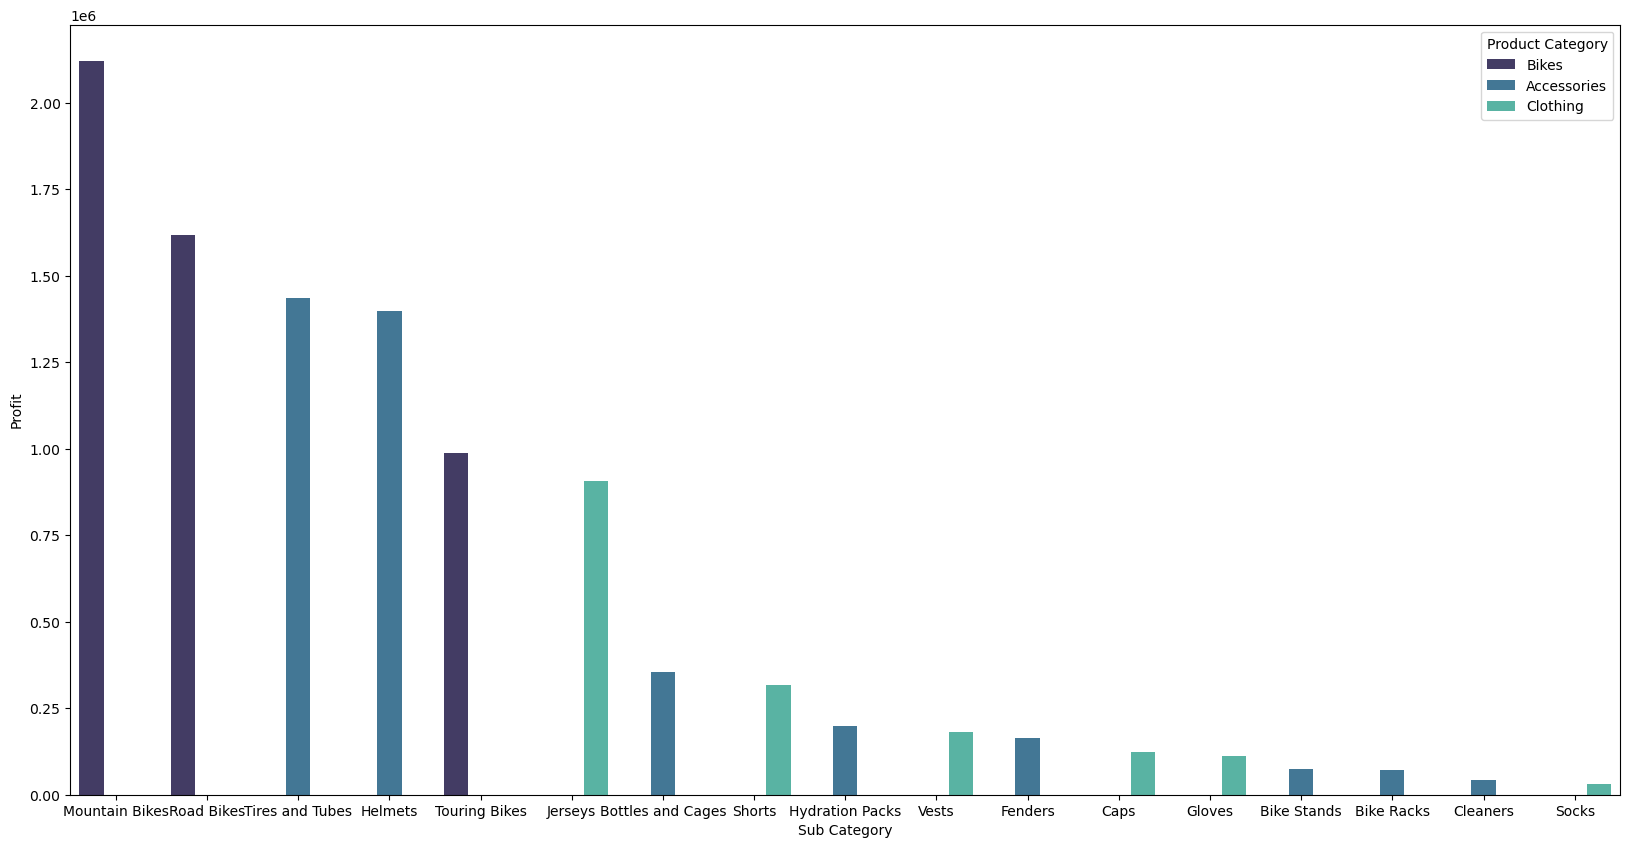

In [88]:
# Let's Visualize this

plt.figure(figsize= (20,10))
sb.barplot(data=final_cat, x = 'Sub Category', y='Profit', hue='Product Category', palette='mako')

In [89]:
# What time of day is typically the most busy? We can depict that through sales count of each hour. 

time = df[['Country','Time']]
time['Time'] =time['Time'].str[:2] + ':00'
us_time = time[time['Country'] == 'United States']
us_counts = pd.DataFrame(us_time.value_counts().reset_index())
us_sort = us_counts.sort_values(by='Time').set_index('Time')
us_sort
# # time_US = time[time['Country'].str.contains('United States')]['Time']
# busy = time_US.value_counts().sort_index()
# busy

    

/var/folders/1j/p8whwxms6f1814w2ryl5tf580000gn/T/ipykernel_1946/3543211746.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['Time'] =time['Time'].str[:2] + ':00'


,Country,count
Time,,
10:00,United States,1795
11:00,United States,1664
12:00,United States,1601
13:00,United States,1863
14:00,United States,1485
15:00,United States,1857
16:00,United States,1381
17:00,United States,1334
18:00,United States,1681


In [90]:
time = df[['Country','Time']]
time['Time'] =time['Time'].str[:2] + ':00'
us_time = time[time['Country'] == 'Germany']
germany_counts = pd.DataFrame(us_time.value_counts().reset_index())
germany_sort = germany_counts.sort_values(by='Time').set_index('Time')
germany_sort

/var/folders/1j/p8whwxms6f1814w2ryl5tf580000gn/T/ipykernel_1946/2745500180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['Time'] =time['Time'].str[:2] + ':00'


,Country,count
Time,,
10:00,Germany,524
11:00,Germany,455
12:00,Germany,481
13:00,Germany,534
14:00,Germany,440
15:00,Germany,545
16:00,Germany,411
17:00,Germany,388
18:00,Germany,476


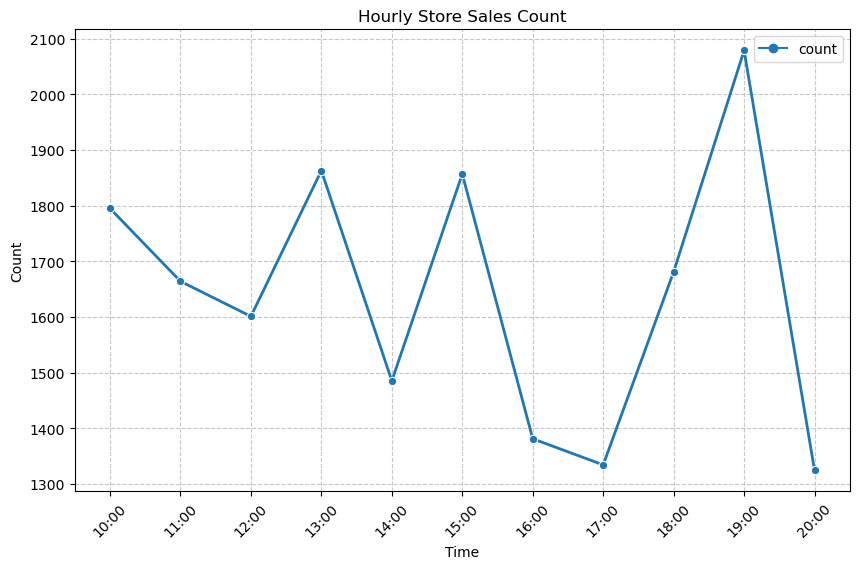

In [91]:
plt.figure(figsize=(10,6))
sb.lineplot(us_sort, markers='o', linestyle = '-', linewidth = 2, color = 'blue')
plt.title('Hourly Store Sales Count')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)



In [92]:
# Which Country has the most profit? Which State?

df_country_= pd.DataFrame(df[['Country','Profit']])
df_countries = df_country_.groupby('Country').sum().reset_index().sort_values(by= df_country_.columns[-1], ascending = False)
df_countries

,Country,Profit
3,United States,4509567.59
1,Germany,2232273.34
2,United Kingdom,1889420.78
0,France,1510137.45


In [93]:
df_state = pd.DataFrame(df[['Country', 'State','Profit']])
df_states = df_state.groupby(['Country', 'State']).sum().reset_index().sort_values(by= df_state.columns[-1], ascending = False)
df_states

,Country,State,Profit
25,United States,California,2626259.27
22,United Kingdom,England,1889420.78
43,United States,Washington,1268561.00
38,United States,Oregon,595002.81
21,Germany,Saarland,551720.71
19,Germany,Hessen,488972.59
20,Germany,Nordrhein-Westfalen,481095.84
18,Germany,Hamburg,373099.39
9,France,Seine (Paris),313984.42
16,Germany,Bayern,288268.80


## Additional Questions to Consider
<b>

### 1. How many stores are there in each country? (Assuming that the store to state ratio is 1:1)
<b>

### 2. Why are the stores the bottom 19 stores all from the United States? What can we see here from number of transactions and the dates in which they occur?
<b>

###


In [94]:
states_count = df_states['Country'].value_counts().reset_index()
states_count

,Country,count
0,United States,22
1,France,16
2,Germany,6
3,United Kingdom,1


In [131]:
# Seems like something is wrong with the number of transactions that occur in the US aside from Oregon, Washington, California
trans = pd.DataFrame(df[['Country', 'State']])
subsect = trans[trans['Country']== 'United States'].groupby('State').value_counts().reset_index().sort_values(by= trans.columns[-1])
subsect_filtered = subsect[subsect['count']< 100000].sort_values(by='count', ascending = False).reset_index().drop('index', axis= 1)
subsect_filtered = subsect_filtered.rename(columns = {'count': 'No. of Transactions'}) 
subsect_filtered





,State,Country,No. of Transactions
0,California,United States,10324
1,Washington,United States,5200
2,Oregon,United States,2446
3,Illinois,United States,14
4,Texas,United States,14
5,Ohio,United States,13
6,New York,United States,10
7,Florida,United States,7
8,Utah,United States,5
9,South Carolina,United States,5


### The UK only has one store in London, it seems plausible to either add another store in London or an additional store in California while closing down the bottom 19 stores in the US.